In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
eigsfile = "./data/bulk_bands_efields.h5"
efields = []
eigvals_all = []
vbm_all, cbm_all, efermi_all = [], [], []

with h5py.File(eigsfile, "r") as f:
    klist = f["kx_list"][()]
    
    # read in the eigvals for each efield
    for k in f.keys():
        if k[0] == "e": 
            efields.append(float(k.split("e")[-1]))
            eigvals_e = f[f"{k}/eigvals"][()]
            eigvals_all.append(eigvals_e)
            vbm_all.append(f[f"{k}/vbm"][()])
            cbm_all.append(f[f"{k}/cbm"][()])
            efermi_all.append(f[f"{k}/efermi"][()])

eigvals_all = np.array(eigvals_all)
efields = np.array(efields) 

In [3]:
# sort the efields from smallest to largest
# and accordingly sort the eigvals
sort_inds = np.argsort(efields)
efields = efields[sort_inds]
eigvals_all = eigvals_all[sort_inds]
vbm_all = np.array(vbm_all)[sort_inds]
cbm_all = np.array(cbm_all)[sort_inds]
efermi_all = np.array(efermi_all)[sort_inds]

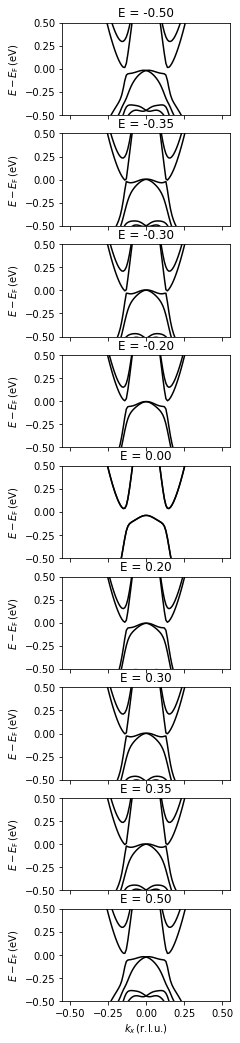

In [4]:
# visualize the bands 
fig, ax = plt.subplots(efields.shape[0], 1, 
                       figsize=(3,2*efields.shape[0]), 
                       sharex=True, sharey=True)

for iax, efield, eigvals in zip(ax, efields, eigvals_all):
    for band in eigvals.T:
        iax.plot(klist, band, color="k")
    iax.set_title(f"E = {efield:.2f}")
    iax.set_ylim([-0.5, 0.5])
    iax.set_ylabel(r'$E-E_{\mathrm{F}}\,$(eV)')

ax[-1].set_xlabel(r'$k_x\,$(r.l.u.)')
fig.savefig("./figures/bulk_bands_efields.png", dpi=480, bbox_inches="tight")

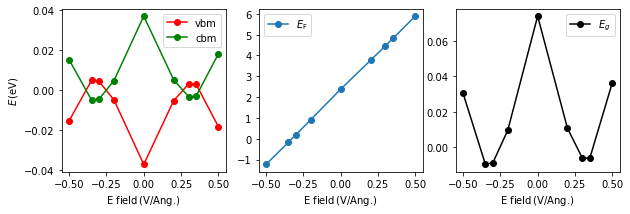

In [5]:
# check out the vbm and cbm and the efermi values
fig, ax = plt.subplots(1,3,figsize=(10,3))

ax[0].plot(efields, vbm_all, 'o-', c='r', label="vbm")
ax[0].plot(efields, cbm_all, 'o-', c='g', label="cbm")
ax[1].plot(efields, efermi_all, 'o-', label=r"$E_{\mathrm{F}}$")

ax[2].plot(efields, cbm_all - vbm_all, 'o-', c='k', label=r"$E_g$")

for iax in ax:
    iax.legend()
    iax.set_xlabel(r'E field$\,$(V/Ang.)')
ax[0].set_ylabel(r'$E\,$(eV)')

fig.savefig("./figures/bulk_bands_efields_vbm_cbm.png", dpi=480, bbox_inches="tight")